# 1. with ~ as ~ 문

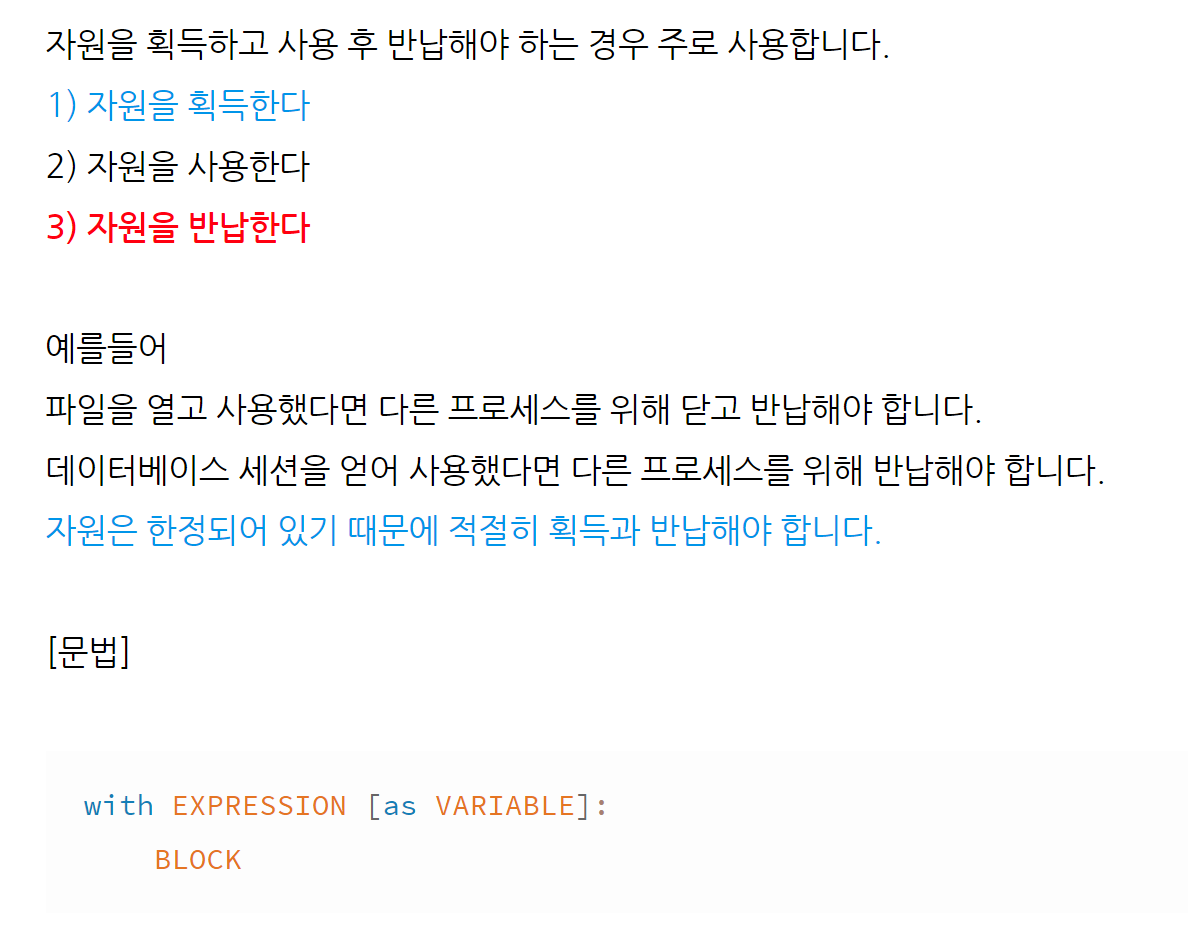

In [1]:
class Hello:
    def __enter__(self):
        # 사용할 자원을 가져오거나 만든다(핸들러 등)
        print('Hello __enter__ 함수 호출')
        return self # 반환값이 있어야 VARIABLE를 블록내에서 사용할 수 있다
        
    def sayHello(self, name):
        # 자원을 사용한다. ex) 인사한다
        print('hello ' + name)

    def __exit__(self, exc_type, exc_val, exc_tb):
        # 마지막 처리를 한다(자원반납 등)
        print('Hello __exit__ 함수 호출')

In [2]:
with Hello() as h:
    # with 문을 시작하면 __enter__ 함수 호출
    h.sayHello('obama')
    h.sayHello('trump')
    # with 문을 종료하기 직전에  __exit__ 함수 호출

Hello __enter__ 함수 호출
hello obama
hello trump
Hello __exit__ 함수 호출


In [3]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [4]:
import numpy as np
import tensorflow as tf


In [5]:
tf.enable_eager_execution() 

In [6]:
#XOR연산의 x1,x2입력을 저장하는 배열
X=  np.array([
              [0., 0.],
              [0., 1.],
              [1., 0.],
              [1., 1.]
         ],dtype="float32")

#XOR연산의 y출력을 저장하는 배열
y = np.array( [
              [0.],
              [1.],
              [1.],
              [0.]
     ], dtype="float32")

In [7]:
X

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32)

In [8]:
y

array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [9]:
#X에 곱해지는 값 선언
w0 = tf.Variable([[1,2],[3,4]], dtype="float32")
w0

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

In [10]:
#X에 더해지는 값 선언
b0 =  tf.Variable([[0,0]], dtype="float32")
b0

<tf.Variable 'Variable:0' shape=(1, 2) dtype=float32, numpy=array([[0., 0.]], dtype=float32)>

In [11]:
#X에 w0를 곱하고 b0을 더함
tf.matmul(X, w0)+b0

<tf.Tensor: id=23, shape=(4, 2), dtype=float32, numpy=
array([[0., 0.],
       [3., 4.],
       [1., 2.],
       [4., 6.]], dtype=float32)>

In [12]:
#X에 w0를 곱하고 b0을 더해서 활성 함수 sigmoid를 계산
hypothesis0=tf.sigmoid(tf.matmul(X, w0)+b0)
hypothesis0

<tf.Tensor: id=29, shape=(4, 2), dtype=float32, numpy=
array([[0.5       , 0.5       ],
       [0.95257413, 0.98201376],
       [0.7310586 , 0.8807971 ],
       [0.98201376, 0.99752736]], dtype=float32)>

In [13]:
#hypothesis0에 곱해지는 w1을 선언
w1 = tf.Variable([[5],[6]], dtype="float32")
w1

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[5.],
       [6.]], dtype=float32)>

In [14]:
#hypothesis0에 더해지는 값 선언
b1 =  tf.Variable([[0]], dtype="float32")
b1

<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.]], dtype=float32)>

In [15]:
#hypothesis0에 w1을 곱하고 b1을 더함
tf.matmul(hypothesis0, w1)+b1

<tf.Tensor: id=51, shape=(4, 1), dtype=float32, numpy=
array([[ 5.5     ],
       [10.654953],
       [ 8.940076],
       [10.895233]], dtype=float32)>

In [16]:
#hypothesis0에 w1을 곱하고 활성함수 sigmoid를 실행함
hypothesis1=tf.sigmoid(tf.matmul(hypothesis0, w1))
hypothesis1

<tf.Tensor: id=54, shape=(4, 1), dtype=float32, numpy=
array([[0.9959299],
       [0.9999764],
       [0.999869 ],
       [0.9999814]], dtype=float32)>

In [17]:
#W와 b값을 자동으로 수정하는 Optimizer 객체를 생성
optimizer = tf.train.AdamOptimizer(0.1)

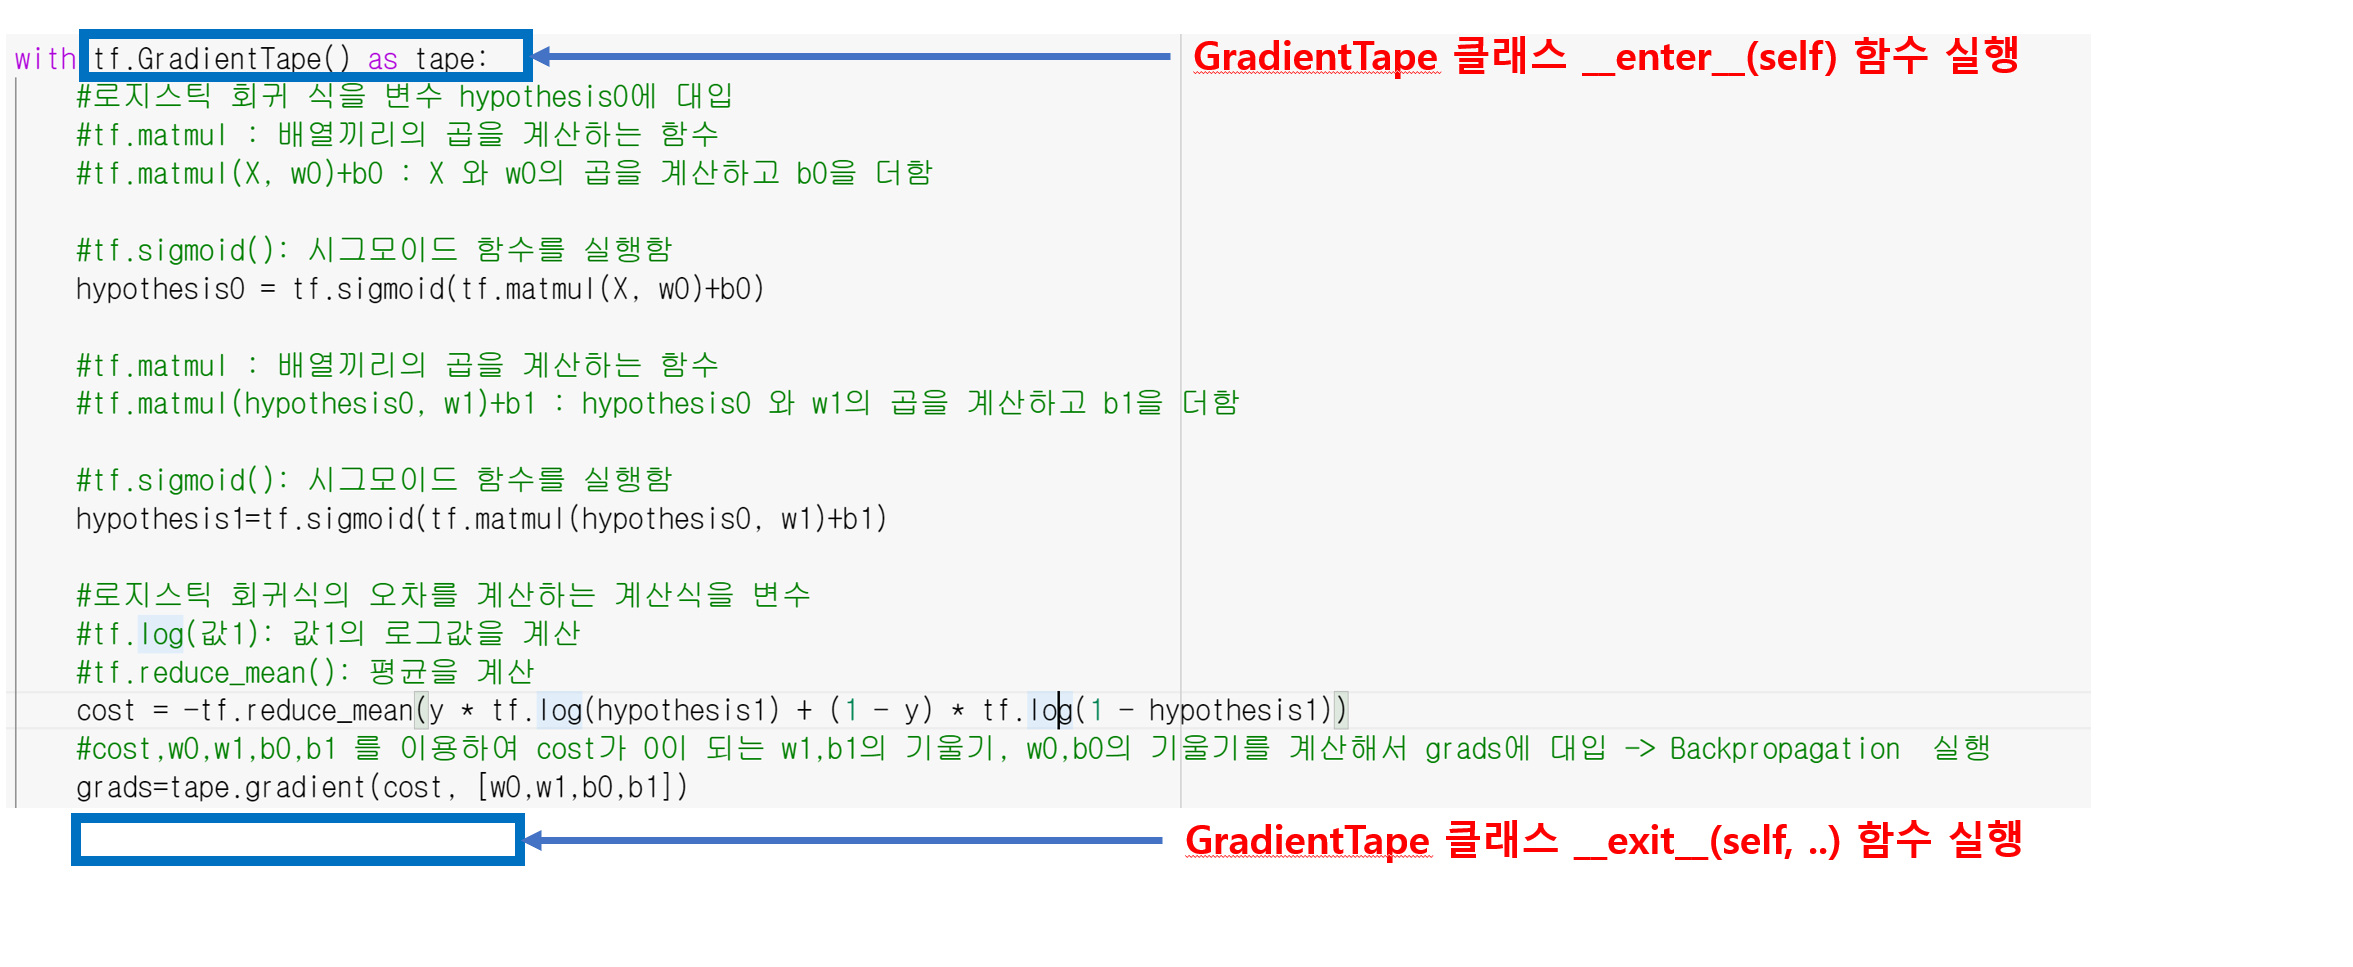

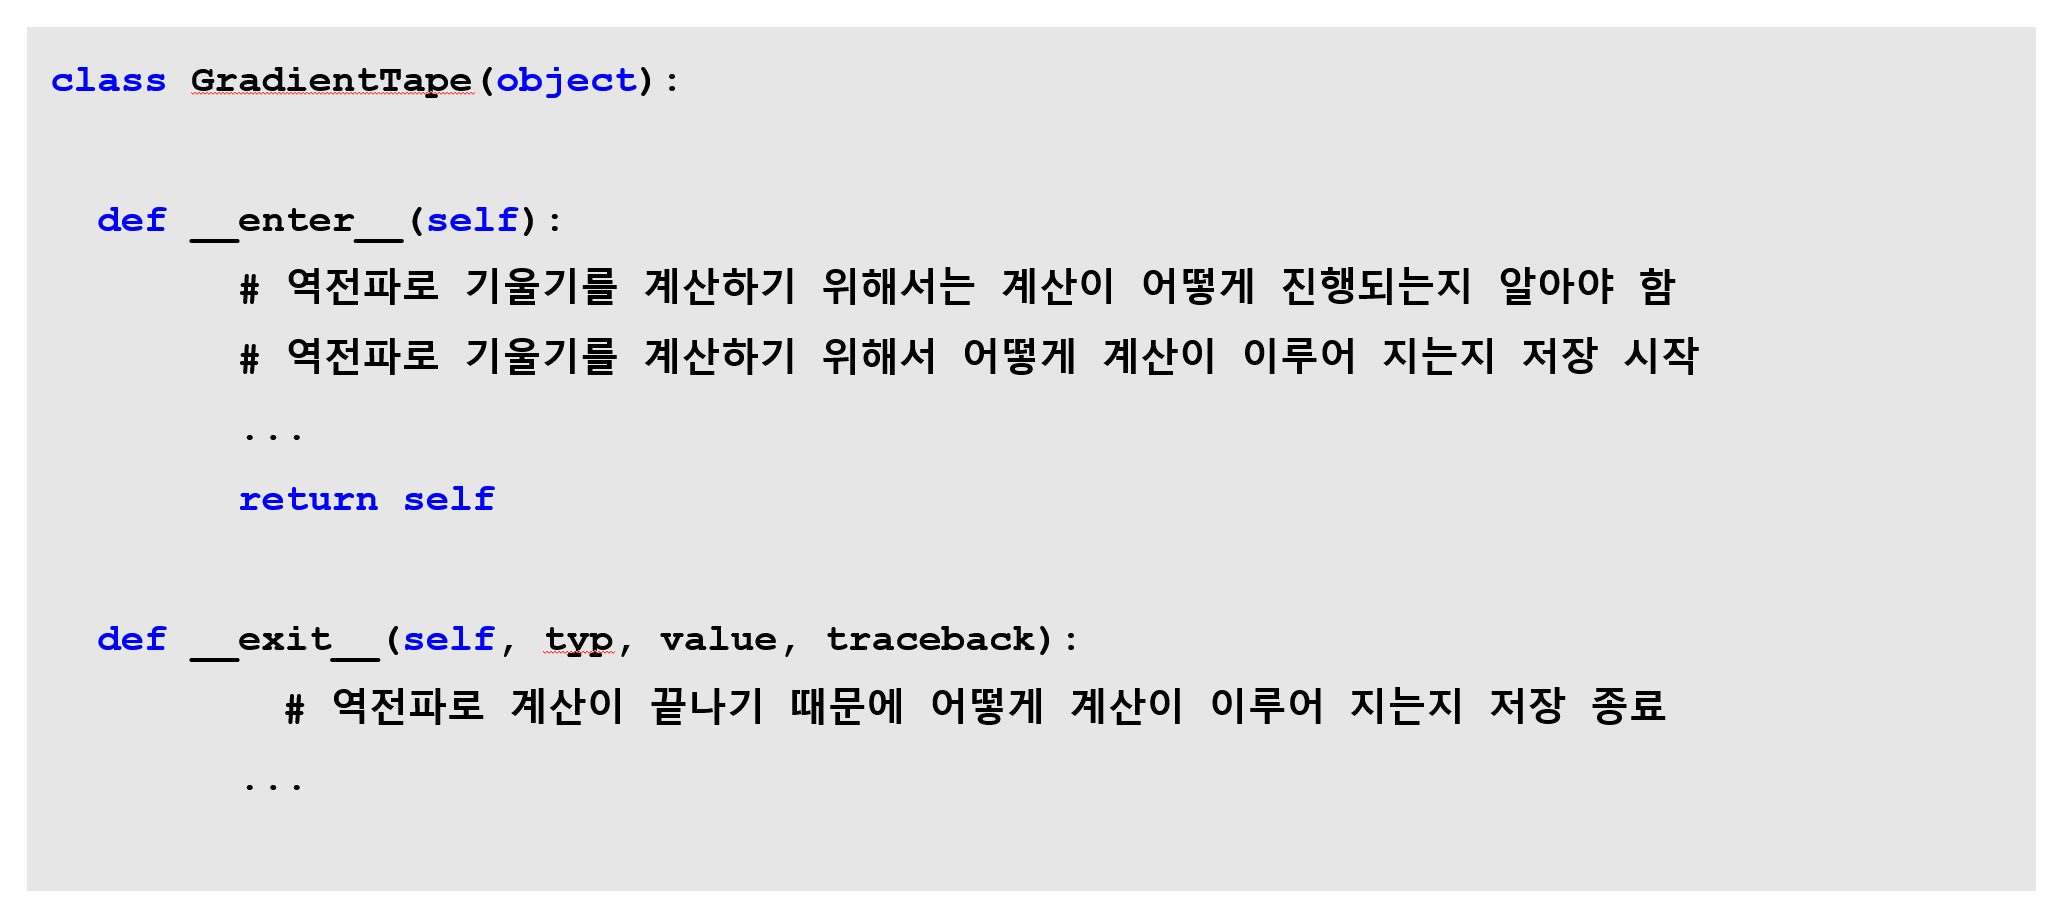

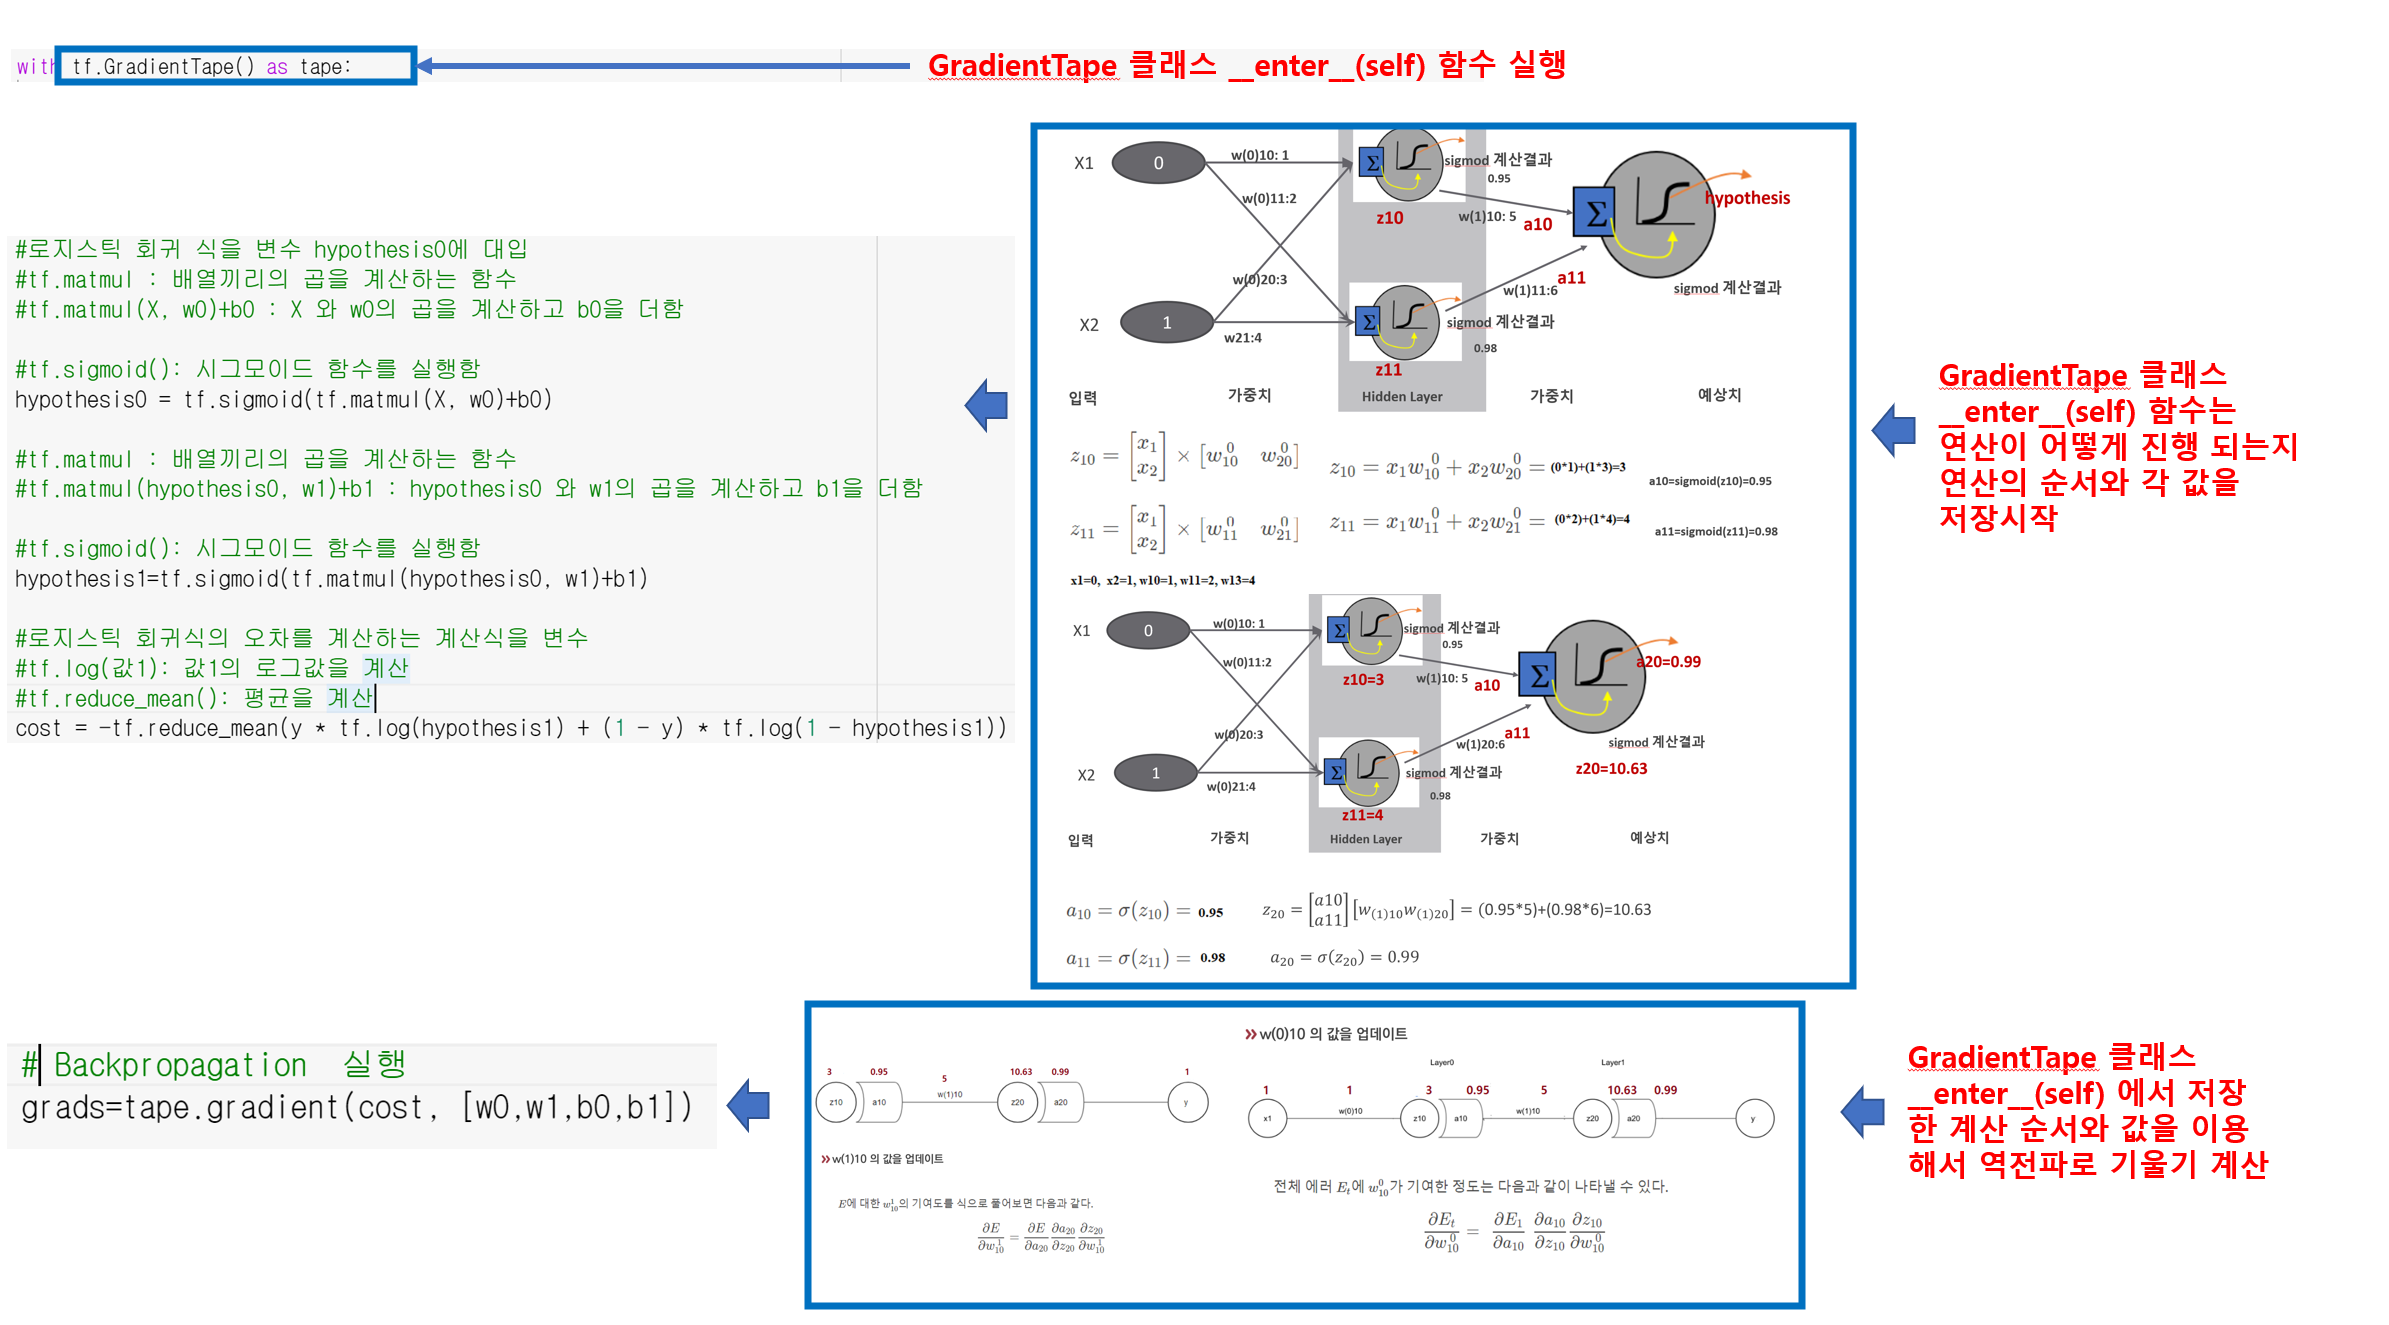

In [21]:
#backpropagation을 이용해서 w1->w0을 찾음
#5000번 반복
for step in range(5000):
    #tf.GradientTape():GradientDecent로 오차가 0이되는 w0,w1을 찾아줄 객체를 생성해서 리턴
    with tf.GradientTape() as tape:
        #로지스틱 회귀 식을 변수 hypothesis0에 대입
        #tf.matmul : 배열끼리의 곱을 계산하는 함수
        #tf.matmul(X, w0)+b0 : X 와 w0의 곱을 계산하고 b0을 더함
        
        #tf.sigmoid(): 시그모이드 함수를 실행함
        hypothesis0 = tf.sigmoid(tf.matmul(X, w0)+b0)
        
        #tf.matmul : 배열끼리의 곱을 계산하는 함수
        #tf.matmul(hypothesis0, w1)+b1 : hypothesis0 와 w1의 곱을 계산하고 b1을 더함
        
        #tf.sigmoid(): 시그모이드 함수를 실행함
        hypothesis1=tf.sigmoid(tf.matmul(hypothesis0, w1)+b1)
        
        #로지스틱 회귀식의 오차를 계산하는 계산식을 변수  
        #tf.log(값1): 값1의 로그값을 계산
        #tf.reduce_mean(): 평균을 계산
        cost = -tf.reduce_mean(y * tf.log(hypothesis1) + (1 - y) * tf.log(1 - hypothesis1))
        # Backpropagation  실행
        grads=tape.gradient(cost, [w0,w1,b0,b1])
        
        #grads에 저장된 w0,b0의 기울기와 w1,b1의 기울기를 w0,b0와 w1,b1에서 빼주고 새로운
        #w0,b0와 w1,b1로 업데이트
        optimizer.apply_gradients(grads_and_vars=zip(grads,[w0,w1,b0,b1]))

        if step % 100 == 0:
            print("cost:{},w0:{},w1:{}".format(cost,w0,w1)) 
            print("=" * 100)          


cost:4.0991926193237305,w0:<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.9000014, 1.9000086],
       [2.9000015, 3.9000084]], dtype=float32)>,w1:<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.9],
       [5.9]], dtype=float32)>
cost:0.557486355304718,w0:<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-2.0565379, -4.4126105],
       [ 1.2810545,  3.0600321]], dtype=float32)>,w1:<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[2.6855311],
       [3.8502126]], dtype=float32)>
cost:0.5103297233581543,w0:<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-2.586327 , -6.2746325],
       [ 1.5904139,  4.8805475]], dtype=float32)>,w1:<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[2.3543897],
       [4.411695 ]], dtype=float32)>
cost:0.49529534578323364,w0:<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-2.8877606, -7.3770695],
       [ 1.6697845,

In [22]:
#Gradient Decent를 이용하여 계산한 w0 
w0

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ -9.12464 , -12.648861],
       [  9.688222,  12.943744]], dtype=float32)>

In [23]:
#Gradient Decent를 이용하여 계산한 b0
b0

<tf.Variable 'Variable:0' shape=(1, 2) dtype=float32, numpy=array([[ 4.284906 , -7.1995845]], dtype=float32)>

In [24]:
#Gradient Decent를 이용하여 계산한 w01
w1

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-17.039652],
       [ 17.550508]], dtype=float32)>

In [25]:
#Gradient Decent를 이용하여 계산한 b1
b1

<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[8.180049]], dtype=float32)>

In [26]:
#X에 w0을 곱하고 b0을 더해서 sigmoid실행한 값을 hypothesis0에 대입
hypothesis0 = tf.sigmoid(tf.matmul(X, w0)+b0)
#hypothesis0,에 w1을 곱하고 b1을 더해서 sigmoid실행한 값을 predict에 대입
predict=tf.sigmoid(tf.matmul(hypothesis0, w1)+b1)
predict

<tf.Tensor: id=415360, shape=(4, 1), dtype=float32, numpy=
array([[1.8133664e-04],
       [9.9982232e-01],
       [9.9967980e-01],
       [1.6499007e-04]], dtype=float32)>

In [27]:
#tf.cast(조건): 조건을 만족하는 데이터 혹은 True는 1로 변환
#조건을 만족하지 못하는 데이터 혹은 False는 0으로 변환
#-> 0.5 초과는 1로 변환, 0.5 이하는 0으로 변환
predict01 = tf.cast(predict > 0.5, dtype=tf.float32)
print("====================================")
print("predict01")
print(predict01)

predict01
tf.Tensor(
[[0.]
 [1.]
 [1.]
 [0.]], shape=(4, 1), dtype=float32)


In [28]:
#(tf.equal(predict01, y) : 조건을 만족하면 해당 줄칸에 True리턴 아니면 False리턴
#tf.equal(predict01, y) : predict01와 y의 값이 같으면 해당 줄칸에
#True 리턴 , 아니면 False리턴
ac01=tf.equal(predict01, y)
ac01

<tf.Tensor: id=415365, shape=(4, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True]])>

In [29]:
#tf.cast(): True는 1로 변환, False는 0으로 변환
ac02=tf.cast(ac01, dtype="float32")
ac02

<tf.Tensor: id=415366, shape=(4, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [30]:
#tf.reduce_mean(): 변환한 0과 1의 합을 구한 후에 데이터의 개수로 나눔
ac03=tf.reduce_mean(ac02)
ac03

<tf.Tensor: id=415368, shape=(), dtype=float32, numpy=1.0>

In [31]:
#정확도를 계산
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict01, y), dtype=tf.float32))
print("====================================")
print("accuracy")
print(accuracy.numpy())

accuracy
1.0


In [32]:
#0,1 의 XOR 연산 실행
#XOR연산을 계산할 0,1을 arr에 대입
arr=np.array([[0,1]], dtype="float32")
#sigmoid(arr*w0+b0) 를 계산
hypothesis0=tf.sigmoid(tf.matmul(arr, w0) + b0)
#sigmoid(hypothesis0*w1+b1) 를 계산
predict=tf.sigmoid(tf.matmul(hypothesis0, w1)+b1)
predict

<tf.Tensor: id=415384, shape=(1, 1), dtype=float32, numpy=array([[0.9998223]], dtype=float32)>

In [33]:
#0.5이상 조건을 만족하면 1 만족하지 않으면 0 리턴
predict=tf.cast(predict > 0.5, dtype=tf.float32)
predict.numpy()

array([[1.]], dtype=float32)

In [34]:
#1,1 의 XOR 연산 실행
#XOR연산을 계산할 1,1을 arr에 대입
arr=np.array([[1,1]], dtype="float32")
#sigmoid(arr*w0+b0) 를 계산
hypothesis0=tf.sigmoid(tf.matmul(arr, w0) + b0)
#sigmoid(hypothesis0*w1+b1) 를 계산
predict=tf.sigmoid(tf.matmul(hypothesis0, w1)+b1)
predict

<tf.Tensor: id=415398, shape=(1, 1), dtype=float32, numpy=array([[0.00016499]], dtype=float32)>

In [35]:
#0.5이상 조건을 만족하면 1 만족하지 않으면 0 리턴
predict=tf.cast(predict > 0.5, dtype=tf.float32)
predict.numpy()

array([[0.]], dtype=float32)